In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


%run functions.ipynb

df = pd.read_csv('logs-66769.csv', parse_dates = ["timecreated"])
roles = pd.read_csv('roles-66769.csv')

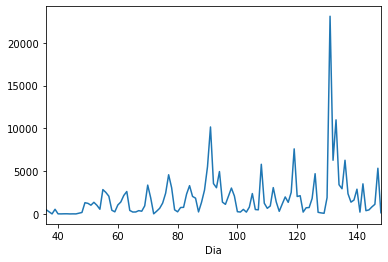

In [2]:
df.head()
df.dtypes


group = df.groupby('action')
group_A = group['timecreated']

group_B = df.groupby(['action', pd.Grouper(key='timecreated', freq='30s')])

df['Dia'] = df.timecreated.dt.dayofyear
df.groupby("Dia")['id'].count().plot()


In [3]:
df.head()
gp = df.groupby('userid')['action']
#df.drop(df[df.crud != 'r'].index).groupby('userid')['crud'].value_conts()

In [4]:
#Visualizção por id:

In [5]:
gd = df.loc[df['crud'] == 'r']
gd.groupby('userid')['crud'].count()

userid
2           41
15882        5
29547      231
34239       48
37340       22
39023      643
48871      153
50211     4255
60360      452
62142       82
72443        1
86675       15
126774       5
136221     982
137946     905
156798    1019
164769     690
170334      24
211859      92
213985      94
214522       5
233923      16
247116      68
249493     116
251113     540
251196     878
251523     498
252073     539
252418     609
252807     898
          ... 
272105     147
272166      39
272276       1
272316     695
272394      97
272461       5
272523     855
273299     863
273681    1416
273854     626
276435     351
276742     647
276811     466
276920     485
276935     738
276993      36
277017     554
277728     605
277861       5
277960     486
277964     576
277981     616
277986     678
278137     439
278140     375
278237     689
278345     794
278812     624
279155     715
280072     588
Name: crud, Length: 223, dtype: int64

In [6]:
#Visualização total (crud == r)

In [7]:
df.groupby('crud')['userid'].count()

crud
c     13598
d      8203
r    118927
u     76922
Name: userid, dtype: int64

In [8]:
#Número de contribuição (crud == u)
    u = df.loc[df['crud'] == 'u']
    u.groupby('crud')['userid'].count()

crud
u    76922
Name: userid, dtype: int64

In [9]:
df.drop(df[(df.objecttable != 'forum_posts') | (df.crud == 'u')].index).head(5)

,Unnamed: 0,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,...,userid,courseid,relateduserid,anonymous,other,timecreated,origin,ip,realuserid,Dia
228,228,1259904984,\mod_forum\event\assessable_uploaded,mod_forum,uploaded,assessable,forum_posts,699325.0,c,2,...,50211,66769,NaN,0,"a:4:{s:7:""content"";s:1250:""<p></p><p>Caro alun...",2019-02-05 15:41:51,restore,177.141.242.47,NaN,36
229,229,1259904985,\mod_forum\event\assessable_uploaded,mod_forum,uploaded,assessable,forum_posts,699326.0,c,2,...,50211,66769,NaN,0,"a:4:{s:7:""content"";s:1314:""<p></p><p>Caro alun...",2019-02-05 15:41:51,restore,177.141.242.47,NaN,36
230,230,1259904986,\mod_forum\event\assessable_uploaded,mod_forum,uploaded,assessable,forum_posts,699327.0,c,2,...,50211,66769,NaN,0,"a:4:{s:7:""content"";s:1251:""<p></p><p>Caro alun...",2019-02-05 15:41:51,restore,177.141.242.47,NaN,36
1878,1878,1261000302,\mod_forum\event\assessable_uploaded,mod_forum,uploaded,assessable,forum_posts,699975.0,c,2,...,50211,66769,NaN,0,"a:4:{s:7:""content"";s:750:""<p>Caro aluno de CN:...",2019-02-18 13:15:36,web,177.141.242.47,NaN,49
3012,3012,1261349996,\mod_forum\event\assessable_uploaded,mod_forum,uploaded,assessable,forum_posts,700176.0,c,2,...,50211,66769,NaN,0,"a:4:{s:7:""content"";s:530:""<p>Caro aluno de CN:...",2019-02-19 17:34:50,web,143.107.58.2,NaN,50


In [10]:
# Quantas postagens no fórum?
    df.objecttable.drop(df[(df.objecttable != 'forum_posts')].index).count()

123

In [11]:
# Quantas postagens no fórum é diferente de crud = u?
    df.objecttable.drop(df[(df.objecttable != 'forum_posts') | (df.crud == 'u')].index).count()

107

In [12]:
# Quantas postagens no fórum é igual a crud = u?
    df.objecttable.drop(df[(df.objecttable != 'forum_posts') | (df.crud != 'u')].index).count()

16

In [13]:
# Quantas entrega de quiz?
    df.objecttable.drop(df[(df.objecttable != 'quiz_attempts')].index).count()    

47606

In [14]:
# Quantos entrega de quiz são crud = u?
    df.objecttable.drop(df[(df.objecttable != 'quiz_attempts') | (df.crud != 'u')].index).count()

4911

In [15]:
# Quantos entrega de quiz não são crud = u?
    df.objecttable.drop(df[(df.objecttable != 'quiz_attempts') | (df.crud == 'u')].index).count()

42695

In [16]:
# crud = r por tempo por dia

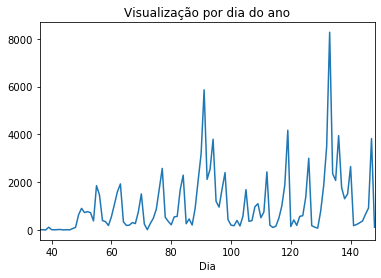

In [17]:
cont = df[df['crud'] == 'r'].groupby('Dia').size()
cont.plot(title = "Visualização por dia do ano")

In [18]:
# Atividade no fórum por dia

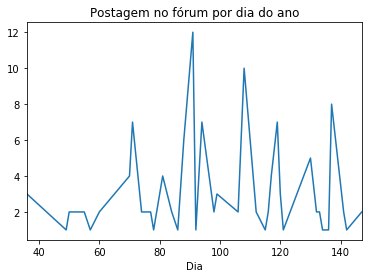

In [19]:
forum = df[df['objecttable'] == 'forum_posts'].groupby('Dia').size()
forum.plot(title = "Postagem no fórum por dia do ano")

In [20]:
# Atividade Geral

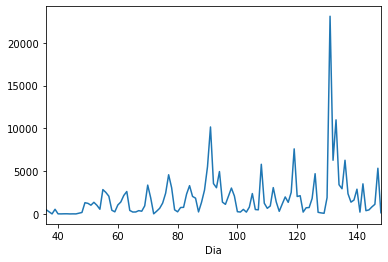

In [21]:
geral = df.groupby('Dia').size()
geral.plot()

In [22]:
foruns = df[df['objecttable'] == 'forum_posts']
foruns.groupby(['contextinstanceid']).count()

,Unnamed: 0,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,...,userid,courseid,relateduserid,anonymous,other,timecreated,origin,ip,realuserid,Dia
contextinstanceid,,,,,,,,,,,,,,,,,,,,,
2474267,117,117,117,117,117,117,117,117,117,117,...,117,117,0,117,117,117,117,117,0,117
2474474,2,2,2,2,2,2,2,2,2,2,...,2,2,0,2,2,2,2,1,0,2
2474475,2,2,2,2,2,2,2,2,2,2,...,2,2,0,2,2,2,2,1,0,2
2474476,2,2,2,2,2,2,2,2,2,2,...,2,2,0,2,2,2,2,1,0,2


TypeError: Empty 'DataFrame': no numeric data to plot

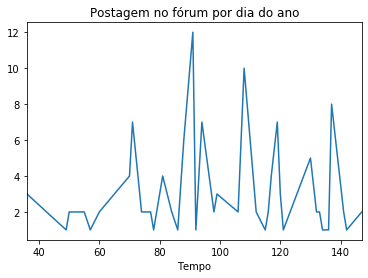

In [23]:
#Plota um gráfico#
def plot(y,x):
    df['Tempo'] = df.timecreated.dt.dayofyear
    forum = df[df[y] == x].groupby('Tempo').size()
    forum.plot(title = "Postagem no fórum por dia do ano")
    
plot('objecttable','forum_posts')
plot('action','')



Quantos quentionários respondidos?

In [24]:
df['userid'].nunique()

224

In [25]:
gd = df[df['action'] == 'viewed']


In [26]:
t = gd['userid'].value_counts().max()
data = pd.DataFrame(gd['userid'].value_counts())
type(data.loc[270426])

greater_than_100 = data[data['userid']>=100]

greater_than_100




,userid
50211,4150
270426,1468
273681,1324
270826,1249
271083,1223
259978,1101
270412,1081
271115,1062
271547,1023
156798,1012


/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


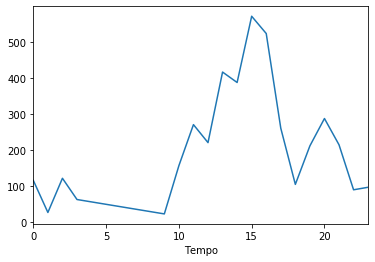

In [27]:
g = gd['userid'].value_counts().sum()/gd['userid'].nunique()
(gd['userid'].value_counts()/g)


def plot(x, y):
    gd = df[df['action'] == y]
    gd['Tempo'] = gd.timecreated.dt.hour
    forum = gd[df['userid'] == x].groupby('Tempo').size()
    forum.plot(title = "")
    
plot(50211, 'viewed')


In [28]:
df[df['action'] == 'assigned'].groupby('userid').size()

userid
2         9
50211    53
dtype: int64

In [38]:
acoes = df['action'].unique().tolist()
aluno = df['userid'].unique().tolist()

def media_acao(x,data):
    V = data[data['role'] == 'student']
    g = data[data['action'] == x].groupby('userid').size()
    return g.mean()


In [30]:
data = pd.merge(df, roles)

In [37]:
def acao_aluno(aluno, acao, data):
    g = data[data['userid'] == aluno]
    return g[g['action'] == acao]['action'].count()

a = acao_aluno(60360, 'viewed', data)
m = media_acao('viewed', data)
m

663.5361445783133

In [32]:
def estatisticas(student):
    acoes = data['action'].unique().tolist()
    media_turma = []
    aluno = []
    for k in acoes:
        media_turma.append(media_acao(k, data))
        aluno.append(acao_aluno(student, k, data))
    d = {'Média turma': media_turma, 'Média Aluno': aluno}
    dat = pd.DataFrame(d, index = acoes)
    dat['Taxa'] = dat['Média Aluno']/dat['Média turma']
    return dat, dat['Média Aluno'].mean(), dat['Média turma'].mean()
g, ma, mt = estatisticas(60360)
g
ma, mt

(17.870967741935484, 122.37770441470742)

In [33]:
data['Tempo'] = df.timecreated.dt.dayofyear
def plot(aluno):
    data['Tempo'] = data.timecreated.dt.dayofyear
    forum = data[data['action'] == 'viewed'][data['userid'] == aluno].groupby('Tempo').size()
    forum.plot(title = "Postagem no fórum por dia do ano")



In [ ]:
test = Statistic(data)
test.media_acao('viewed')